### import libraries

In [138]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
import requests
import webbrowser
from geopandas.tools import geocode
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Shortlisted Citites from the CSV file

In [84]:
df=pd.read_csv("Abu Dhabi Cities.csv")

In [85]:
df.head()

,Place,Address
0,Al Aman,Al Aman Abu Dhabi
1,Al Dhafrah,Al Dhafrah Abu Dhabi
2,Al Falah,Al Falah Abu Dhabi
3,Al Karama,Al Karama Abu Dhabi
4,Al Khubeirah,Al Khubeirah Abu Dhabi


Renaming column name from Place to Cities

In [86]:
df=df.rename(columns={'Place':'Cities'})

In [87]:
df.head()

,Cities,Address
0,Al Aman,Al Aman Abu Dhabi
1,Al Dhafrah,Al Dhafrah Abu Dhabi
2,Al Falah,Al Falah Abu Dhabi
3,Al Karama,Al Karama Abu Dhabi
4,Al Khubeirah,Al Khubeirah Abu Dhabi


Using geocode librabry adding latitude and longitude in to the data frame

In [106]:
geo=geocode(df['Address'], provider='nominatim')

df['latitude'] =geo.centroid.x
df['longitude'] =geo.centroid.y

Using foursquare APIs getting the location details

In [107]:
CLIENT_ID = 'OC2Z3BAX5LIQGUSSI2ZOZCPB324IIAFRYLG0H1T2OKMKGBNL' # your Foursquare ID
CLIENT_SECRET = 'A3N4IZM5ESAKKLGJMXZKRZRA4RDCHHDLPBP0OXXXV5C52MW1' # your Foursquare Secret
VERSION = '20200504'
LIMIT = 10000
radius = 1000
cat="4d4b7105d754a06374d81259" #Filtering only for restaurant category type

In [90]:
nearby_venues_list=pd.DataFrame([])
for index, row in df.iterrows():
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row['longitude'], 
    row['latitude'], 
    radius, 
    LIMIT,cat)
    results = requests.get(url).json()
    venues = results['response']['venues']
    nearby_venues=json_normalize(venues)
    nearby_venues['Cities'] =row['Cities']
    nearby_venues_list=nearby_venues_list.append(nearby_venues)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [91]:
nearby_venues_list.head()

,Cities,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,Al Aman,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4d3687fdedbd37041c566be3,ADNOC (786) - Opp Police College,AE,أبوظبي,الإمارات العربية المتحدة,Murror St. (4th St.),367,[ADNOC (786) - Opp Police College (Murror St. ...,"[{'label': 'display', 'lat': 24.43464611205368...",24.434646,54.424393,NaN,NaN,أبوظبي,McDonald's,v-1589702867,NaN
1,Al Aman,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",False,4ed7ed052c5b95fea262143a,ADNOC,AE,أبوظبي,الإمارات العربية المتحدة,at Sultan Bin Zayed The First St,378,"[ADNOC (at Sultan Bin Zayed The First St), أبو...","[{'label': 'display', 'lat': 24.4351564386356,...",24.435156,54.425187,Muroor,NaN,أبوظبي,Subway,v-1589702867,NaN
2,Al Aman,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,583e8da64f417a56ae8036af,Al Muroor,AE,Abu Dhabu,الإمارات العربية المتحدة,Sixth Street,766,"[Al Muroor (Sixth Street), Abu Dhabu, الإمارات...","[{'label': 'display', 'lat': 24.43217119065485...",24.432171,54.434108,NaN,NaN,NaN,Zattara (زتارا),v-1589702867,NaN
3,Al Aman,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5ae1c6fa491be7002caf7144,"Al Muroor, Opposite Shakespeare.",AE,أبوظبي,الإمارات العربية المتحدة,Almuroor Rd.,870,"[Al Muroor, Opposite Shakespeare. (Almuroor Rd...","[{'label': 'display', 'lat': 24.432432, 'lng':...",24.432432,54.435129,NaN,NaN,أبوظبي,Little Malibu Cafe,v-1589702867,NaN
4,Al Aman,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4efc65e6775bec14297a479b,"31st Street, Danat Abu Dhabi",AE,أبوظبي,الإمارات العربية المتحدة,NaN,914,"[31st Street, Danat Abu Dhabi, أبوظبي, الإمارا...","[{'label': 'display', 'lat': 24.43190533540528...",24.431905,54.435571,NaN,NaN,أبوظبي,Starbucks (ستاربكس),v-1589702867,NaN


Since the category field is list object following code used for adding the list as column to existing data frame

In [92]:
Cate_div=nearby_venues_list["categories"].str.get(0)
 
Categories_Details=Cate_div.apply(pd.Series )

Categories_Details.rename(columns={'name':'CategoryName'},inplace=True)
 
nearby_venues_lists= pd.concat([nearby_venues_list, Categories_Details], axis=1, sort=False)

In [93]:
nearby_venues_lists.head()

,Cities,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,...,location.state,name,referralId,venuePage.id,id,CategoryName,pluralName,shortName,icon,primary
0,Al Aman,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4d3687fdedbd37041c566be3,ADNOC (786) - Opp Police College,AE,أبوظبي,الإمارات العربية المتحدة,Murror St. (4th St.),367,...,أبوظبي,McDonald's,v-1589702867,NaN,4bf58dd8d48988d16e941735,Fast Food Restaurant,Fast Food Restaurants,Fast Food,{'prefix': 'https://ss3.4sqi.net/img/categorie...,True
1,Al Aman,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",False,4ed7ed052c5b95fea262143a,ADNOC,AE,أبوظبي,الإمارات العربية المتحدة,at Sultan Bin Zayed The First St,378,...,أبوظبي,Subway,v-1589702867,NaN,4bf58dd8d48988d1c5941735,Sandwich Place,Sandwich Places,Sandwiches,{'prefix': 'https://ss3.4sqi.net/img/categorie...,True
2,Al Aman,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,583e8da64f417a56ae8036af,Al Muroor,AE,Abu Dhabu,الإمارات العربية المتحدة,Sixth Street,766,...,NaN,Zattara (زتارا),v-1589702867,NaN,4bf58dd8d48988d16a941735,Bakery,Bakeries,Bakery,{'prefix': 'https://ss3.4sqi.net/img/categorie...,True
3,Al Aman,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5ae1c6fa491be7002caf7144,"Al Muroor, Opposite Shakespeare.",AE,أبوظبي,الإمارات العربية المتحدة,Almuroor Rd.,870,...,أبوظبي,Little Malibu Cafe,v-1589702867,NaN,4bf58dd8d48988d16d941735,Café,Cafés,Café,{'prefix': 'https://ss3.4sqi.net/img/categorie...,True
4,Al Aman,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4efc65e6775bec14297a479b,"31st Street, Danat Abu Dhabi",AE,أبوظبي,الإمارات العربية المتحدة,NaN,914,...,أبوظبي,Starbucks (ستاربكس),v-1589702867,NaN,4bf58dd8d48988d1e0931735,Coffee Shop,Coffee Shops,Coffee Shop,{'prefix': 'https://ss3.4sqi.net/img/categorie...,True


Filtering the restaurant Types

In [149]:
rest_type =['Gluten-free Restaurant', 'Lebanese Restaurant','Yemeni Restaurant','Asian Restaurant', 
       'Chinese Restaurant', 'Indian Restaurant','Japanese Restaurant', 'Middle Eastern Restaurant',
       'Filipino Restaurant', 'Pakistani Restaurant','Seafood Restaurant', 
       'Mediterranean Restaurant','Italian Restaurant','Vegetarian / Vegan Restaurant',  'French Restaurant',
       'African Restaurant', 'Korean Restaurant', 'Eastern European Restaurant', 
        'Turkish Restaurant', 'German Restaurant', 'American Restaurant', 'Greek Restaurant',
       'South Indian Restaurant','Peruvian Restaurant',  'Thai Restaurant',
        'Russian Restaurant','Mexican Restaurant', 'North Indian Restaurant',
        'Egyptian Restaurant', 'Iraqi Restaurant','Indian Chinese Restaurant', 
       'Vietnamese Restaurant', 'Portuguese Restaurant', 'New American Restaurant',
       'Malay Restaurant', 'English Restaurant','Afghan Restaurant', 'Halal Restaurant', 'Ethiopian Restaurant',
       'Moroccan Restaurant', 'Spanish Restaurant', 'Modern European Restaurant']

nearby_venues_lists= nearby_venues_lists[nearby_venues_lists.CategoryName.isin(rest_type)]
df=df[df.Cities.isin(nearby_venues_lists['Cities'] )]

In [150]:
loc_onehot = pd.get_dummies(nearby_venues_lists[['CategoryName']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
loc_onehot['Neighbourhood'] =nearby_venues_lists['Cities'] 

# move neighborhood column to the first column
fixed_columns = [loc_onehot.columns[-1]] + list(loc_onehot.columns[:-1])
loc_onehot = loc_onehot[fixed_columns]

loc_data_grouped = loc_onehot.groupby('Neighbourhood').mean().reset_index()
loc_data_grouped.head()


,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Eastern European Restaurant,Egyptian Restaurant,English Restaurant,Ethiopian Restaurant,...,Portuguese Restaurant,Russian Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yemeni Restaurant
0,Al Aman,0.0,0.00,0.000000,0.100000,0.100000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.1
1,Al Dhafrah,0.0,0.00,0.000000,0.105263,0.210526,0.00,0.0,0.0,0.0,...,0.0,0.0,0.052632,0.0,0.0,0.0,0.000000,0.00,0.0,0.0
2,Al Karama,0.0,0.04,0.000000,0.000000,0.000000,0.04,0.0,0.0,0.0,...,0.0,0.0,0.040000,0.0,0.0,0.0,0.000000,0.04,0.0,0.0
3,Al Khalidyah,0.0,0.00,0.076923,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.384615,0.00,0.0,0.0
4,Al Khubeirah,0.0,0.00,0.071429,0.071429,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.071429,0.0,0.0,0.0,0.142857,0.00,0.0,0.0


----Al Aman----
                       venue  freq
0  Middle Eastern Restaurant   0.2
1          Indian Restaurant   0.2
2        Lebanese Restaurant   0.1
3     Gluten-free Restaurant   0.1
4        Japanese Restaurant   0.1
5          Yemeni Restaurant   0.1
6         Chinese Restaurant   0.1
7           Asian Restaurant   0.1
8        Egyptian Restaurant   0.0
9        Moroccan Restaurant   0.0




D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


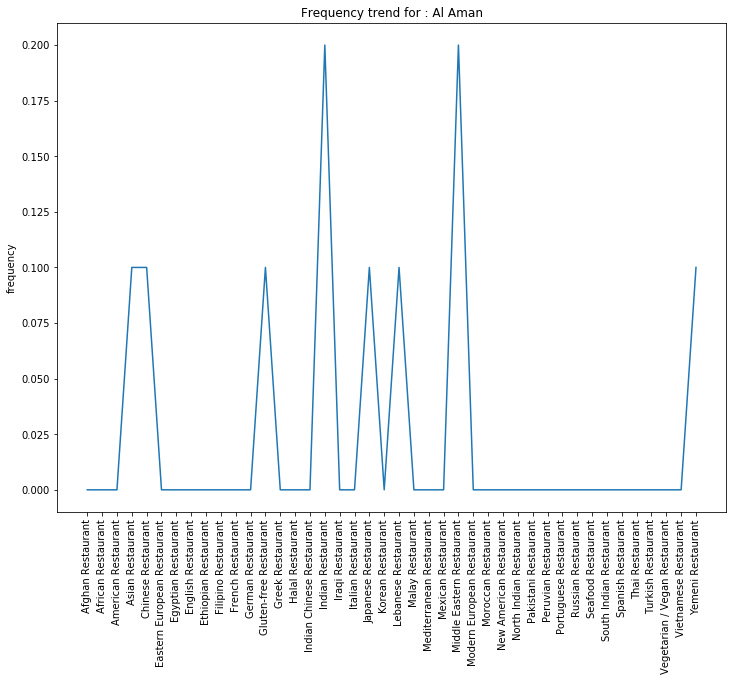

----Al Dhafrah----
                       venue  freq
0         Chinese Restaurant  0.21
1        Filipino Restaurant  0.21
2          Indian Restaurant  0.16
3  Middle Eastern Restaurant  0.11
4           Asian Restaurant  0.11
5   Mediterranean Restaurant  0.05
6         Italian Restaurant  0.05
7         Seafood Restaurant  0.05
8       Pakistani Restaurant  0.05
9        Peruvian Restaurant  0.00




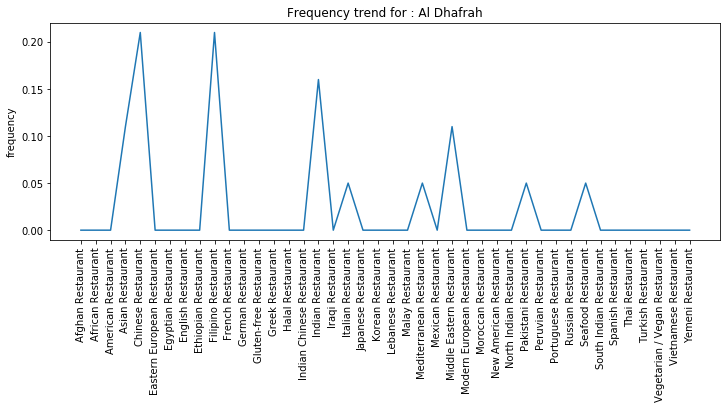

----Al Karama----
                           venue  freq
0              Indian Restaurant  0.44
1            Filipino Restaurant  0.24
2              Korean Restaurant  0.08
3           Pakistani Restaurant  0.04
4  Vegetarian / Vegan Restaurant  0.04
5             African Restaurant  0.04
6    Eastern European Restaurant  0.04
7              French Restaurant  0.04
8             Seafood Restaurant  0.04
9              Afghan Restaurant  0.00




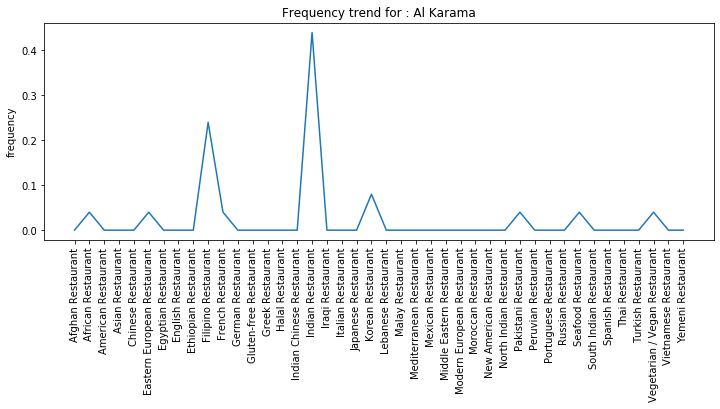

----Al Khalidyah----
                        venue  freq
0          Turkish Restaurant  0.38
1   Middle Eastern Restaurant  0.23
2         American Restaurant  0.08
3         Japanese Restaurant  0.08
4         Moroccan Restaurant  0.08
5            Iraqi Restaurant  0.08
6           Indian Restaurant  0.08
7           Afghan Restaurant  0.00
8        Pakistani Restaurant  0.00
9  Modern European Restaurant  0.00




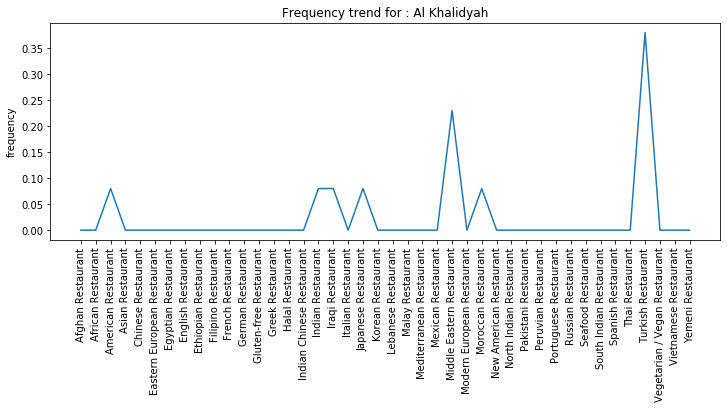

----Al Khubeirah----
                        venue  freq
0   Middle Eastern Restaurant  0.29
1          Italian Restaurant  0.29
2          Turkish Restaurant  0.14
3           German Restaurant  0.07
4         American Restaurant  0.07
5            Asian Restaurant  0.07
6          Seafood Restaurant  0.07
7         Peruvian Restaurant  0.00
8  Modern European Restaurant  0.00
9         Moroccan Restaurant  0.00




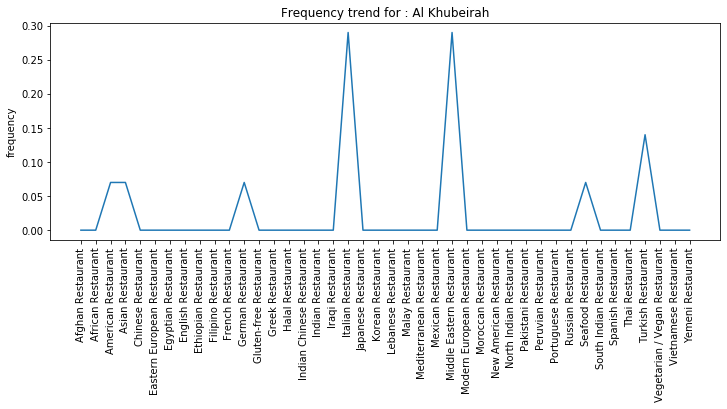

----Al Madina----
                        venue  freq
0   Middle Eastern Restaurant  0.33
1           Indian Restaurant  0.33
2            Asian Restaurant  0.17
3         Filipino Restaurant  0.08
4        Pakistani Restaurant  0.08
5           Afghan Restaurant  0.00
6       Portuguese Restaurant  0.00
7  Modern European Restaurant  0.00
8         Moroccan Restaurant  0.00
9     New American Restaurant  0.00




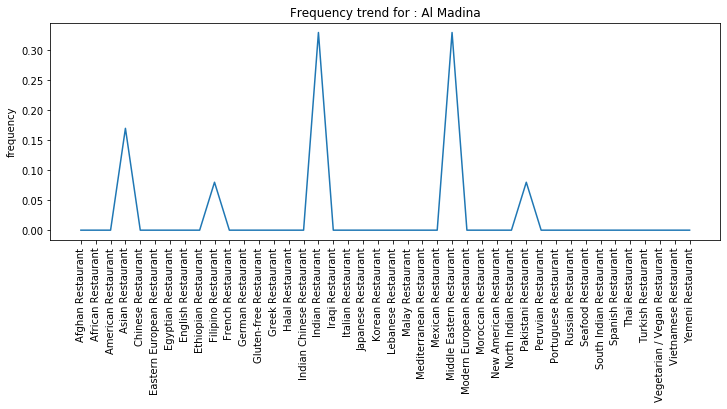

----Al Manhal----
                        venue  freq
0          Italian Restaurant  0.23
1   Middle Eastern Restaurant  0.15
2         Filipino Restaurant  0.15
3           Indian Restaurant  0.15
4          Chinese Restaurant  0.15
5          Seafood Restaurant  0.08
6            Asian Restaurant  0.08
7          Turkish Restaurant  0.00
8        Pakistani Restaurant  0.00
9  Modern European Restaurant  0.00




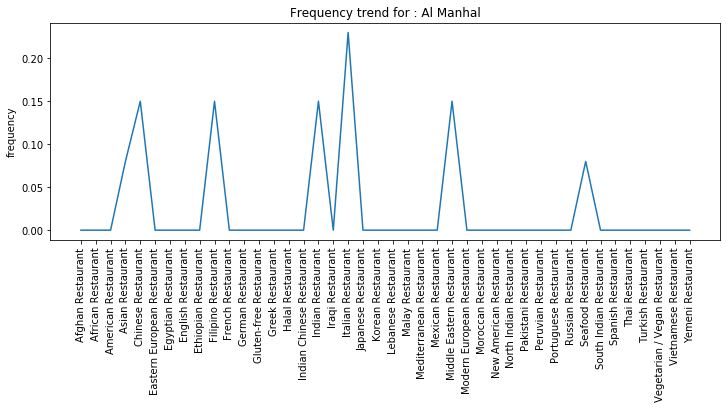

----Al Maqtaa----
                       venue  freq
0  Middle Eastern Restaurant  0.25
1          Indian Restaurant  0.17
2            Thai Restaurant  0.08
3         Italian Restaurant  0.08
4          French Restaurant  0.08
5        Filipino Restaurant  0.08
6         Seafood Restaurant  0.08
7           Asian Restaurant  0.08
8        American Restaurant  0.08
9         Turkish Restaurant  0.00




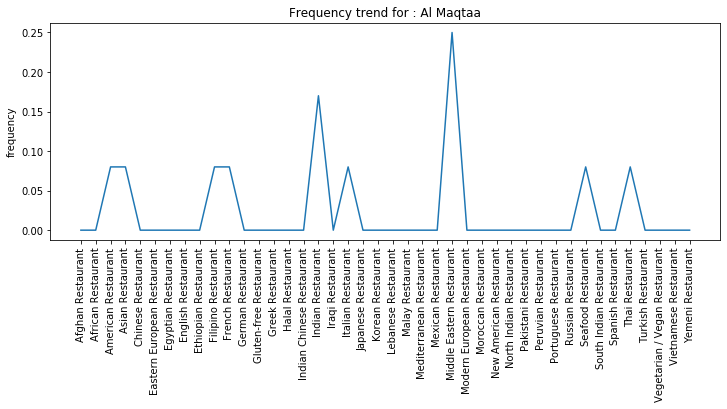

----Al Markaziyah----
                       venue  freq
0         Chinese Restaurant  0.13
1        Filipino Restaurant  0.13
2          Indian Restaurant  0.13
3  Middle Eastern Restaurant  0.07
4       Pakistani Restaurant  0.07
5           Asian Restaurant  0.07
6            Thai Restaurant  0.07
7         Italian Restaurant  0.07
8    South Indian Restaurant  0.07
9         Mexican Restaurant  0.07




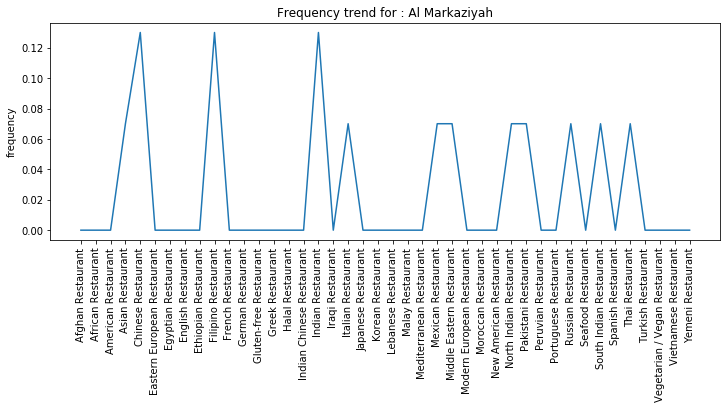

----Al Maryah Island----
                       venue  freq
0  Middle Eastern Restaurant  0.14
1        Japanese Restaurant  0.14
2         Italian Restaurant  0.14
3          Indian Restaurant  0.14
4          French Restaurant  0.05
5        Peruvian Restaurant  0.05
6         Seafood Restaurant  0.05
7    South Indian Restaurant  0.05
8          German Restaurant  0.05
9           Greek Restaurant  0.05




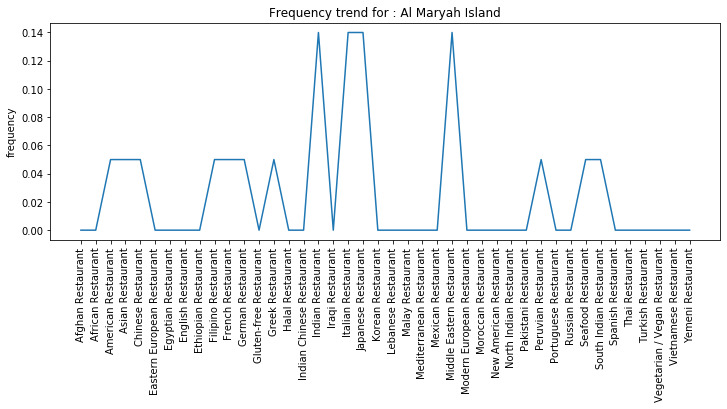

----Al Meena----
                        venue  freq
0          Seafood Restaurant  0.36
1   Middle Eastern Restaurant  0.23
2           Indian Restaurant  0.23
3            Asian Restaurant  0.14
4    Mediterranean Restaurant  0.05
5         Peruvian Restaurant  0.00
6          Mexican Restaurant  0.00
7  Modern European Restaurant  0.00
8         Moroccan Restaurant  0.00
9     New American Restaurant  0.00




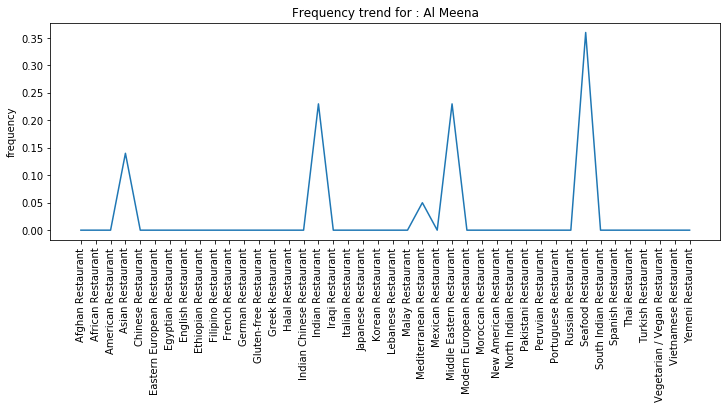

----Al Mushrif----
                           venue  freq
0               Asian Restaurant  0.25
1             Chinese Restaurant  0.25
2  Vegetarian / Vegan Restaurant  0.25
3             Italian Restaurant  0.25
4              Afghan Restaurant  0.00
5            Peruvian Restaurant  0.00
6      Middle Eastern Restaurant  0.00
7     Modern European Restaurant  0.00
8            Moroccan Restaurant  0.00
9        New American Restaurant  0.00




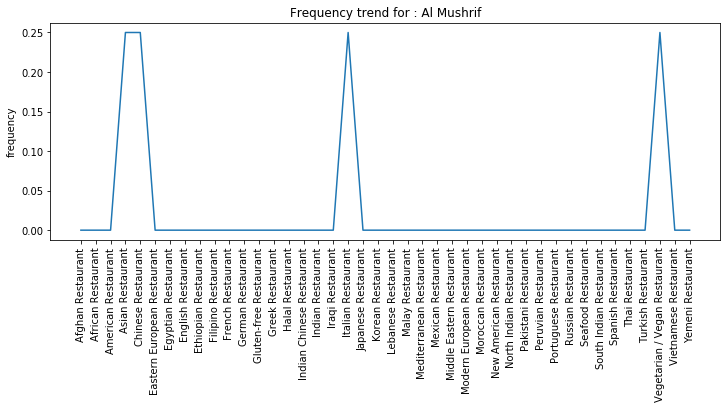

----Al Nahyan----
                        venue  freq
0    Mediterranean Restaurant  0.22
1   Middle Eastern Restaurant  0.11
2          Chinese Restaurant  0.11
3           Korean Restaurant  0.11
4         Egyptian Restaurant  0.11
5            Iraqi Restaurant  0.11
6          Seafood Restaurant  0.11
7           Indian Restaurant  0.11
8        Pakistani Restaurant  0.00
9  Modern European Restaurant  0.00




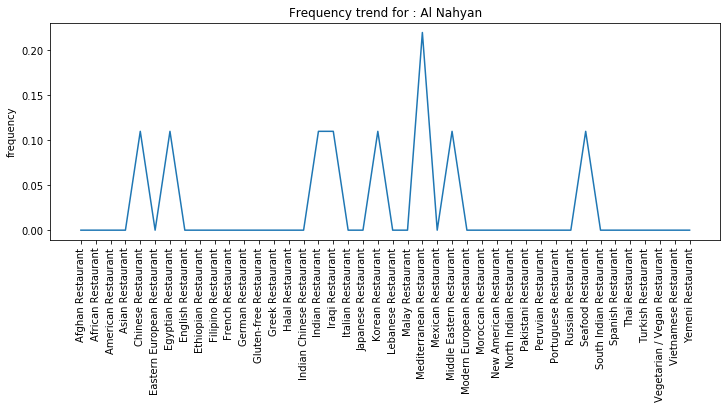

----Al Reef----
                        venue  freq
0   Middle Eastern Restaurant  0.25
1          Turkish Restaurant  0.25
2          Italian Restaurant  0.25
3   Indian Chinese Restaurant  0.12
4           French Restaurant  0.12
5           Afghan Restaurant  0.00
6         Peruvian Restaurant  0.00
7  Modern European Restaurant  0.00
8         Moroccan Restaurant  0.00
9     New American Restaurant  0.00




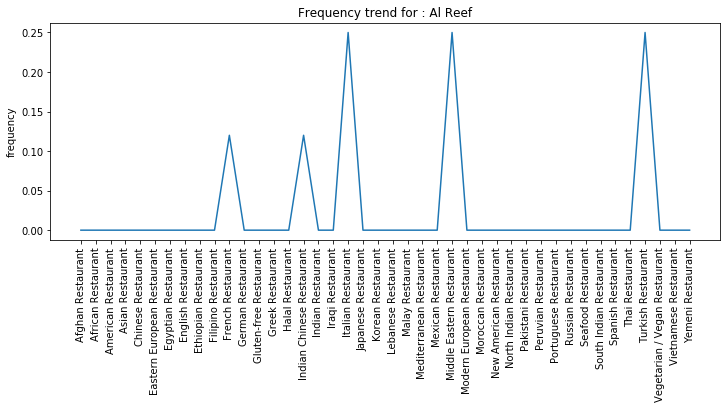

----Al Reem Island----
                           venue  freq
0          Portuguese Restaurant   0.2
1            Lebanese Restaurant   0.1
2          Vietnamese Restaurant   0.1
3             Italian Restaurant   0.1
4        New American Restaurant   0.1
5               Malay Restaurant   0.1
6            American Restaurant   0.1
7               Asian Restaurant   0.1
8             Chinese Restaurant   0.1
9  Vegetarian / Vegan Restaurant   0.0




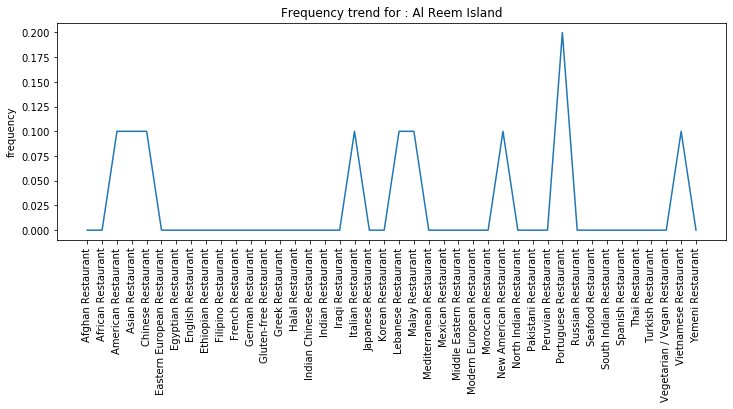

----Al Rowdah----
                         venue  freq
0    Middle Eastern Restaurant  0.17
1             Asian Restaurant  0.17
2  Eastern European Restaurant  0.17
3           Turkish Restaurant  0.17
4           Italian Restaurant  0.17
5            Indian Restaurant  0.17
6            Afghan Restaurant  0.00
7          Peruvian Restaurant  0.00
8   Modern European Restaurant  0.00
9          Moroccan Restaurant  0.00




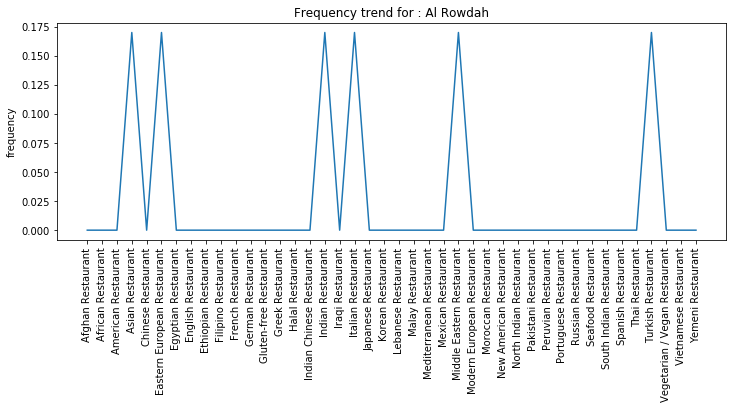

----Al Shamkha----
                        venue  freq
0   Middle Eastern Restaurant   0.5
1          English Restaurant   0.5
2           Afghan Restaurant   0.0
3       Portuguese Restaurant   0.0
4          Mexican Restaurant   0.0
5  Modern European Restaurant   0.0
6         Moroccan Restaurant   0.0
7     New American Restaurant   0.0
8     North Indian Restaurant   0.0
9        Pakistani Restaurant   0.0




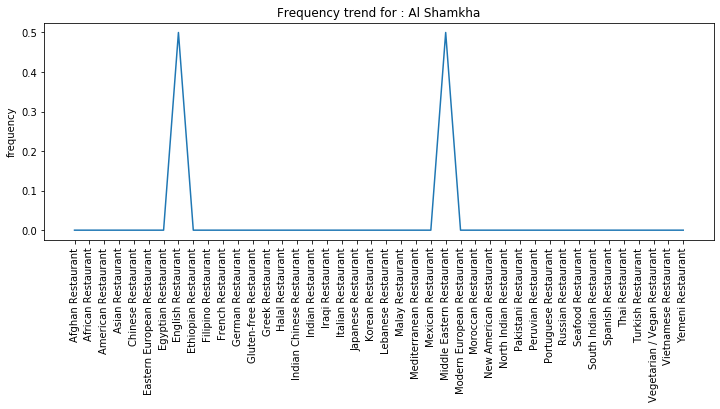

----Al Zahiyah----
                       venue  freq
0  Middle Eastern Restaurant  0.33
1           Asian Restaurant  0.19
2        Filipino Restaurant  0.14
3         African Restaurant  0.05
4        Japanese Restaurant  0.05
5       Ethiopian Restaurant  0.05
6    South Indian Restaurant  0.05
7         Seafood Restaurant  0.05
8    North Indian Restaurant  0.05
9          Indian Restaurant  0.05




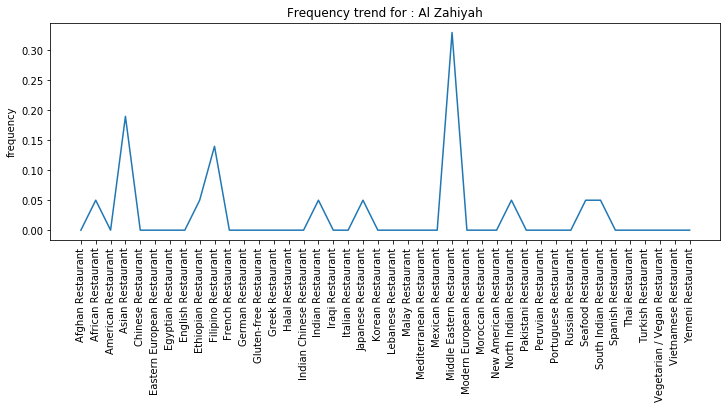

----Al Zahraa----
                        venue  freq
0   Middle Eastern Restaurant  0.25
1            Asian Restaurant  0.25
2         Lebanese Restaurant  0.17
3           Indian Restaurant  0.17
4      Gluten-free Restaurant  0.08
5             Thai Restaurant  0.08
6  Modern European Restaurant  0.00
7         Moroccan Restaurant  0.00
8     New American Restaurant  0.00
9     North Indian Restaurant  0.00




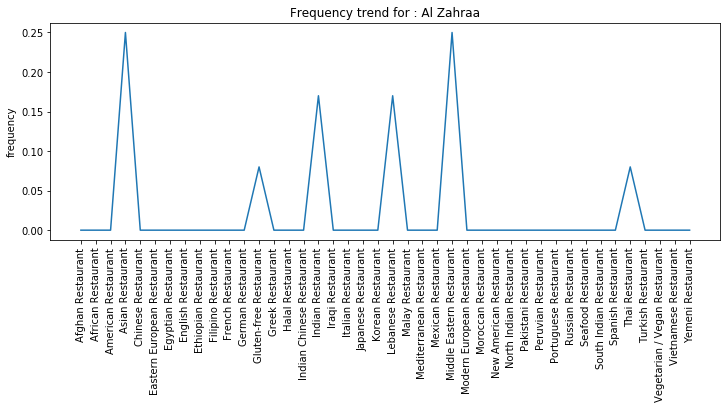

----Bain Al Jisrain----
                       venue  freq
0         Italian Restaurant  0.25
1  Middle Eastern Restaurant  0.19
2          Indian Restaurant  0.19
3        Japanese Restaurant  0.12
4         Spanish Restaurant  0.06
5        Moroccan Restaurant  0.06
6         Seafood Restaurant  0.06
7          French Restaurant  0.06
8          Afghan Restaurant  0.00
9       Pakistani Restaurant  0.00




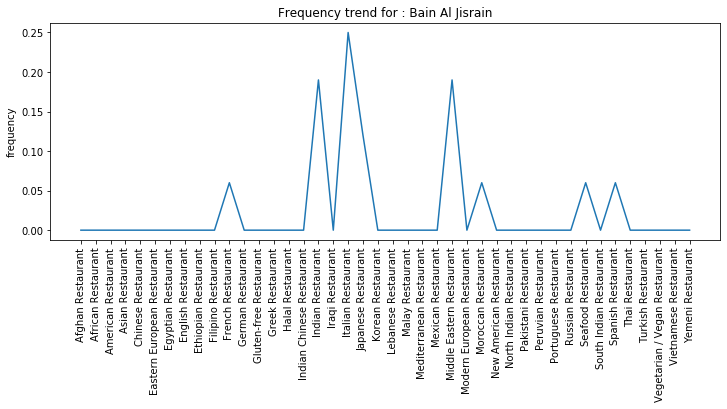

----Bani Yas----
                        venue  freq
0   Middle Eastern Restaurant   0.6
1           Afghan Restaurant   0.2
2            Halal Restaurant   0.2
3         Peruvian Restaurant   0.0
4          Mexican Restaurant   0.0
5  Modern European Restaurant   0.0
6         Moroccan Restaurant   0.0
7     New American Restaurant   0.0
8     North Indian Restaurant   0.0
9        Pakistani Restaurant   0.0




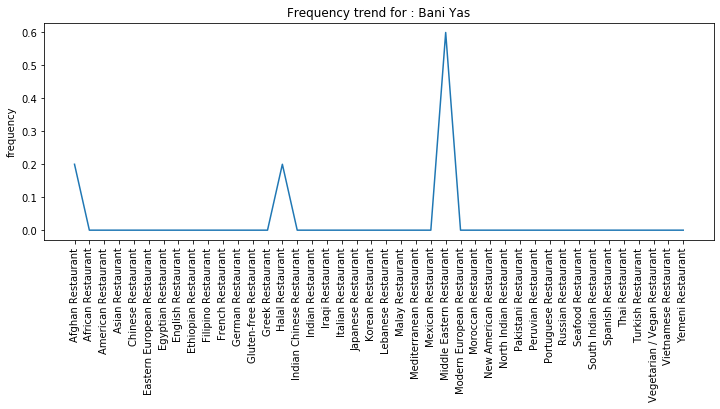

----Hudayriat----
                        venue  freq
0    Mediterranean Restaurant   1.0
1           Afghan Restaurant   0.0
2         Peruvian Restaurant   0.0
3          Mexican Restaurant   0.0
4   Middle Eastern Restaurant   0.0
5  Modern European Restaurant   0.0
6         Moroccan Restaurant   0.0
7     New American Restaurant   0.0
8     North Indian Restaurant   0.0
9        Pakistani Restaurant   0.0




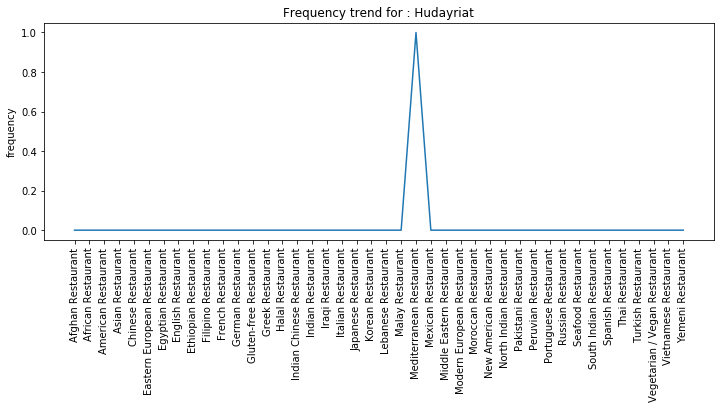

----Khalifa City----
                        venue  freq
0          Italian Restaurant   0.4
1            Asian Restaurant   0.2
2   Middle Eastern Restaurant   0.2
3        Pakistani Restaurant   0.2
4           Afghan Restaurant   0.0
5         Peruvian Restaurant   0.0
6          Mexican Restaurant   0.0
7  Modern European Restaurant   0.0
8         Moroccan Restaurant   0.0
9     New American Restaurant   0.0




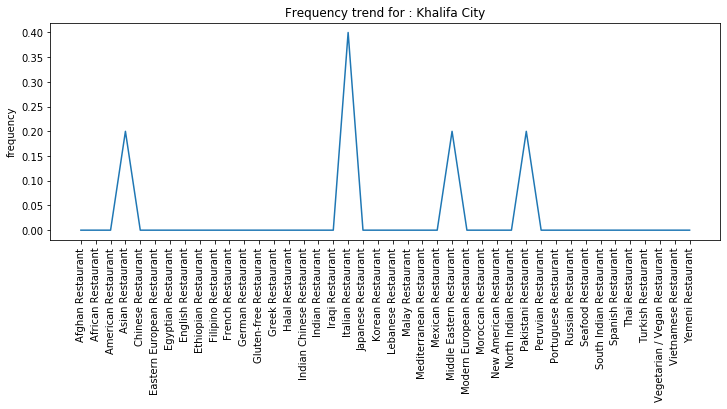

----Masdar City----
                        venue  freq
0   Middle Eastern Restaurant  0.29
1          Mexican Restaurant  0.14
2         Japanese Restaurant  0.14
3          Italian Restaurant  0.14
4  Modern European Restaurant  0.14
5         Egyptian Restaurant  0.14
6         Peruvian Restaurant  0.00
7         Moroccan Restaurant  0.00
8     New American Restaurant  0.00
9     North Indian Restaurant  0.00




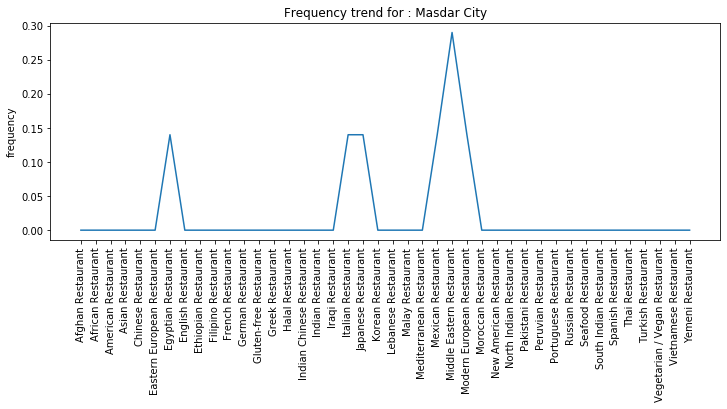

----Officers City----
                       venue  freq
0  Middle Eastern Restaurant  0.23
1          Indian Restaurant  0.23
2           Asian Restaurant  0.15
3    South Indian Restaurant  0.08
4         Italian Restaurant  0.08
5          French Restaurant  0.08
6         Seafood Restaurant  0.08
7          German Restaurant  0.08
8         Spanish Restaurant  0.00
9            Thai Restaurant  0.00




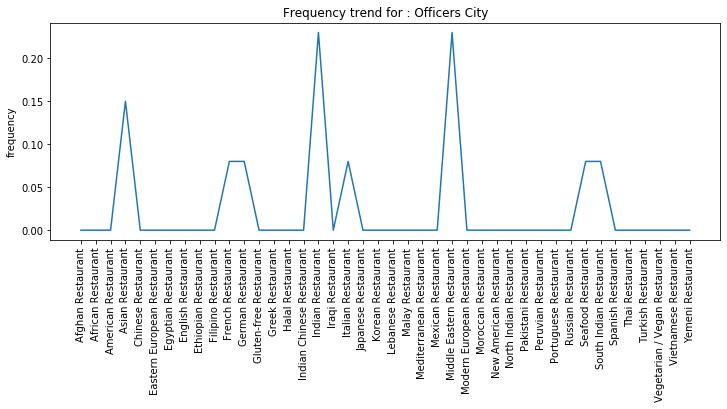

----Qasr El Bahr----
                        venue  freq
0            Asian Restaurant   0.2
1          Italian Restaurant   0.2
2            Malay Restaurant   0.1
3   Middle Eastern Restaurant   0.1
4          Chinese Restaurant   0.1
5             Thai Restaurant   0.1
6          Seafood Restaurant   0.1
7           Indian Restaurant   0.1
8        Pakistani Restaurant   0.0
9  Modern European Restaurant   0.0




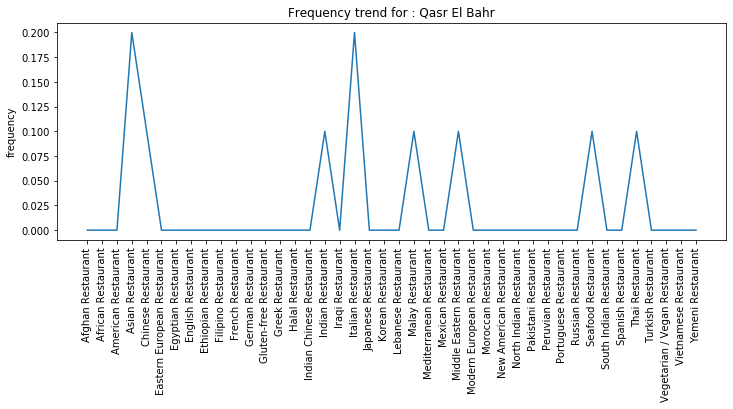

----Yas Island----
                        venue  freq
0          Italian Restaurant   0.3
1   Middle Eastern Restaurant   0.2
2       Vietnamese Restaurant   0.1
3          African Restaurant   0.1
4         Japanese Restaurant   0.1
5           Indian Restaurant   0.1
6    Mediterranean Restaurant   0.1
7           Afghan Restaurant   0.0
8     North Indian Restaurant   0.0
9  Modern European Restaurant   0.0




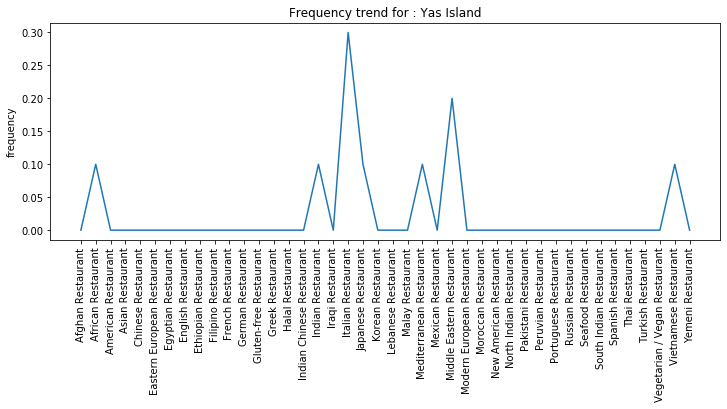

In [170]:
num_top_venues = 10

for hood in loc_data_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = loc_data_grouped[loc_data_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    plt.plot( temp['venue'], temp['freq'])
    #plt.xlabel('k')
    plt.ylabel('frequency')
    plt.title('Frequency trend for : '+hood)
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    #x_axis.set_visible(False)
    plt.xticks(rotation=90)
    plt.rcParams["figure.figsize"] =(12,4)
    plt.show()

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Listing most common restarant types in each cities

In [152]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighbourhood'] = loc_data_grouped['Neighbourhood']

for ind in np.arange(loc_data_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(loc_data_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Aman,Indian Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Lebanese Restaurant,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Iraqi Restaurant,Indian Chinese Restaurant
1,Al Dhafrah,Chinese Restaurant,Filipino Restaurant,Indian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Seafood Restaurant,Mediterranean Restaurant,Italian Restaurant,German Restaurant
2,Al Karama,Indian Restaurant,Filipino Restaurant,Korean Restaurant,Seafood Restaurant,French Restaurant,Eastern European Restaurant,Pakistani Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant
3,Al Khalidyah,Turkish Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Iraqi Restaurant,American Restaurant,Indian Restaurant,Moroccan Restaurant,German Restaurant,Indian Chinese Restaurant,Halal Restaurant
4,Al Khubeirah,Middle Eastern Restaurant,Italian Restaurant,Turkish Restaurant,German Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Yemeni Restaurant,Indian Restaurant,Indian Chinese Restaurant


In [ ]:
Applying Kmenas Clustering on the above data

In [153]:
kclusters = 5

Res_clustering = loc_data_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Res_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
abudhabi_data_merged = df.join(venues_sorted.set_index('Neighbourhood'), on='Cities')

abudhabi_data_merged.head()


,Cities,Address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Aman,Al Aman Abu Dhabi,54.426550,24.431990,0,Indian Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Lebanese Restaurant,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Iraqi Restaurant,Indian Chinese Restaurant
1,Al Dhafrah,Al Dhafrah Abu Dhabi,54.369360,24.476147,3,Chinese Restaurant,Filipino Restaurant,Indian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Seafood Restaurant,Mediterranean Restaurant,Italian Restaurant,German Restaurant
3,Al Karama,Al Karama Abu Dhabi,55.304755,25.244403,3,Indian Restaurant,Filipino Restaurant,Korean Restaurant,Seafood Restaurant,French Restaurant,Eastern European Restaurant,Pakistani Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant
4,Al Khubeirah,Al Khubeirah Abu Dhabi,54.336830,24.465247,1,Middle Eastern Restaurant,Italian Restaurant,Turkish Restaurant,German Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Yemeni Restaurant,Indian Restaurant,Indian Chinese Restaurant
6,Al Madina,Al Madina Abu Dhabi,54.490708,24.340878,0,Indian Restaurant,Middle Eastern Restaurant,Asian Restaurant,Pakistani Restaurant,Filipino Restaurant,French Restaurant,Iraqi Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant


Disply data in map

In [171]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


address = 'Abu Dhabi ,United Arab Emirates'
location = geocode(address,provider='nominatim')
latitude = location.centroid.x
longitude = location.centroid.y
map_clusters = folium.Map(location=[longitude,latitude], zoom_start=10)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip( abudhabi_data_merged['longitude'],abudhabi_data_merged['latitude'], abudhabi_data_merged['Cities'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters.save("mymap.html")
map_clusters
webbrowser.open('mymap.html')

True

## Explore each cluster : Cluster =1

In [117]:
abudhabi_data_merged.loc[abudhabi_data_merged['Cluster Labels'] == 0, abudhabi_data_merged.columns[[1] + list(range(5, abudhabi_data_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Aman Abu Dhabi,Indian Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,Gluten-free Restaurant,Lebanese Restaurant,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Iraqi Restaurant,Indian Chinese Restaurant
6,Al Madina Abu Dhabi,Indian Restaurant,Middle Eastern Restaurant,Asian Restaurant,Pakistani Restaurant,Filipino Restaurant,French Restaurant,Iraqi Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant
9,Al Maqtaa Abu Dhabi,Middle Eastern Restaurant,Indian Restaurant,American Restaurant,Thai Restaurant,Asian Restaurant,Seafood Restaurant,Italian Restaurant,Filipino Restaurant,French Restaurant,Yemeni Restaurant
11,Al Mina Abu Dhabi,Seafood Restaurant,Indian Restaurant,Middle Eastern Restaurant,Asian Restaurant,Mediterranean Restaurant,Yemeni Restaurant,French Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant
13,Al Nahyan Abu Dhabi,Mediterranean Restaurant,Korean Restaurant,Seafood Restaurant,Indian Restaurant,Middle Eastern Restaurant,Egyptian Restaurant,Iraqi Restaurant,Chinese Restaurant,Eastern European Restaurant,English Restaurant
19,Al Zahiyah Abu Dhabi,Middle Eastern Restaurant,Asian Restaurant,Filipino Restaurant,Ethiopian Restaurant,Seafood Restaurant,Indian Restaurant,North Indian Restaurant,Japanese Restaurant,South Indian Restaurant,African Restaurant
20,Al Zahraa Abu Dhabi,Asian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Indian Restaurant,Thai Restaurant,Gluten-free Restaurant,Yemeni Restaurant,French Restaurant,Indian Chinese Restaurant,Halal Restaurant
21,Al Khalidiya Abu Dhabi,Turkish Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Iraqi Restaurant,American Restaurant,Indian Restaurant,Moroccan Restaurant,German Restaurant,Indian Chinese Restaurant,Halal Restaurant
29,Officers City Abu Dhabi,Indian Restaurant,Middle Eastern Restaurant,Asian Restaurant,French Restaurant,South Indian Restaurant,Seafood Restaurant,Italian Restaurant,German Restaurant,Yemeni Restaurant,Indian Chinese Restaurant


## Explore each cluster : Cluster =2

In [124]:
abudhabi_data_merged.loc[abudhabi_data_merged['Cluster Labels'] == 1, abudhabi_data_merged.columns[[1] + list(range(5, abudhabi_data_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Al Khubeirah Abu Dhabi,Middle Eastern Restaurant,Italian Restaurant,Turkish Restaurant,German Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Yemeni Restaurant,Indian Restaurant,Indian Chinese Restaurant
14,Al Reef Abu Dhabi,Italian Restaurant,Turkish Restaurant,Middle Eastern Restaurant,French Restaurant,Indian Chinese Restaurant,Iraqi Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
22,Bain Al Jisrain Abu Dhabi,Italian Restaurant,Indian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,French Restaurant,Spanish Restaurant,Seafood Restaurant,Moroccan Restaurant,Indian Chinese Restaurant,Halal Restaurant
24,Khalifa City Abu Dhabi,Italian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,American Restaurant,Chinese Restaurant,Iraqi Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant
25,Masdar City Abu Dhabi,Middle Eastern Restaurant,Japanese Restaurant,Mexican Restaurant,Egyptian Restaurant,Modern European Restaurant,Italian Restaurant,Gluten-free Restaurant,Iraqi Restaurant,Indian Restaurant,Indian Chinese Restaurant
31,Yas Island Abu Dhabi,Italian Restaurant,Middle Eastern Restaurant,Japanese Restaurant,African Restaurant,Vietnamese Restaurant,Indian Restaurant,Mediterranean Restaurant,Gluten-free Restaurant,Iraqi Restaurant,Indian Chinese Restaurant


## Explore each cluster : Cluster =3

In [125]:
abudhabi_data_merged.loc[abudhabi_data_merged['Cluster Labels'] == 2, abudhabi_data_merged.columns[[1] + list(range(5, abudhabi_data_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Hudayriat Abu Dhabi,Mediterranean Restaurant,Yemeni Restaurant,French Restaurant,Iraqi Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant


## Explore each cluster : Cluster =5

In [126]:
abudhabi_data_merged.loc[abudhabi_data_merged['Cluster Labels'] == 3, abudhabi_data_merged.columns[[1] + list(range(5, abudhabi_data_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Al Dhafrah Abu Dhabi,Chinese Restaurant,Filipino Restaurant,Indian Restaurant,Asian Restaurant,Middle Eastern Restaurant,Pakistani Restaurant,Seafood Restaurant,Mediterranean Restaurant,Italian Restaurant,German Restaurant
3,Al Karama Abu Dhabi,Indian Restaurant,Filipino Restaurant,Korean Restaurant,Seafood Restaurant,French Restaurant,Eastern European Restaurant,Pakistani Restaurant,African Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant
7,Al Maryah Island Abu Dhabi,Italian Restaurant,Japanese Restaurant,Indian Restaurant,Middle Eastern Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,South Indian Restaurant,Seafood Restaurant,Peruvian Restaurant
8,Al Manhal Abu Dhabi,Italian Restaurant,Chinese Restaurant,Indian Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Asian Restaurant,Seafood Restaurant,Gluten-free Restaurant,Iraqi Restaurant,African Restaurant
10,Al Markaziyah Abu Dhabi,Chinese Restaurant,Filipino Restaurant,Indian Restaurant,North Indian Restaurant,Pakistani Restaurant,Mexican Restaurant,Russian Restaurant,South Indian Restaurant,Asian Restaurant,Thai Restaurant
12,Al Mushrif Abu Dhabi,Italian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,French Restaurant,Iraqi Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant
15,Al Reem Island Abu Dhabi,Portuguese Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Lebanese Restaurant,Malay Restaurant,New American Restaurant,Gluten-free Restaurant
16,Al Rowdah Abu Dhabi,Italian Restaurant,Turkish Restaurant,Indian Restaurant,Asian Restaurant,Eastern European Restaurant,Middle Eastern Restaurant,German Restaurant,Iraqi Restaurant,Indian Chinese Restaurant,Halal Restaurant
30,Qasr El Bahr Abu Dhabi,Asian Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Chinese Restaurant,Seafood Restaurant,Malay Restaurant,Middle Eastern Restaurant,Yemeni Restaurant,German Restaurant


## Explore each cluster : Cluster =5

In [128]:
abudhabi_data_merged.loc[abudhabi_data_merged['Cluster Labels'] == 4, abudhabi_data_merged.columns[[1] + list(range(5, abudhabi_data_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Al Shamkha Abu Dhabi,Middle Eastern Restaurant,English Restaurant,Yemeni Restaurant,French Restaurant,Iraqi Restaurant,Indian Restaurant,Indian Chinese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
18,Bani Yas Abu Dhabi,Middle Eastern Restaurant,Afghan Restaurant,Halal Restaurant,French Restaurant,Iraqi Restaurant,Indian Restaurant,Indian Chinese Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
